# **In this Assignment you will perform sentiment analysis on twitter's dataset using Logistic Regression**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
#For Preprocessing
import regex as re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split
from pylab import rcParams
stopwords_set = set(stopwords.words("english"))
%matplotlib inline
pd.options.mode.chained_assignment = None
nltk.download('wordnet')
#import any necessary packages if required

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **Load Tweet dataset download from https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset**

In [ ]:
#fill code
df = pd.read_csv("Twitter_Data.csv")
df.head(5)

#Output the first five rows

#fill code

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


<Axes: xlabel='category'>

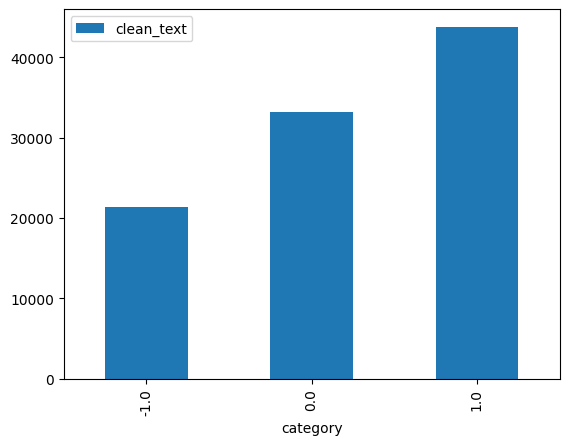

In [ ]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

In [ ]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

In [ ]:
df.columns

Index(['clean_text', 'category'], dtype='object')

# **Visualizing data into wordclouds**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def wordcount_gen(df, category):
    filtered_df = df[(df['category'] == category) & (df['clean_text'].notnull())]
    tweets = " ".join(filtered_df['clean_text'].astype(str))
    if (category=='Positive'or category=='Neutral'):
      color='white'
    elif(category=='Negative'):
      color='black'
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=800,
                          background_color=color,
                          stopwords=STOPWORDS,
                          min_font_size=10).generate(tweets)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

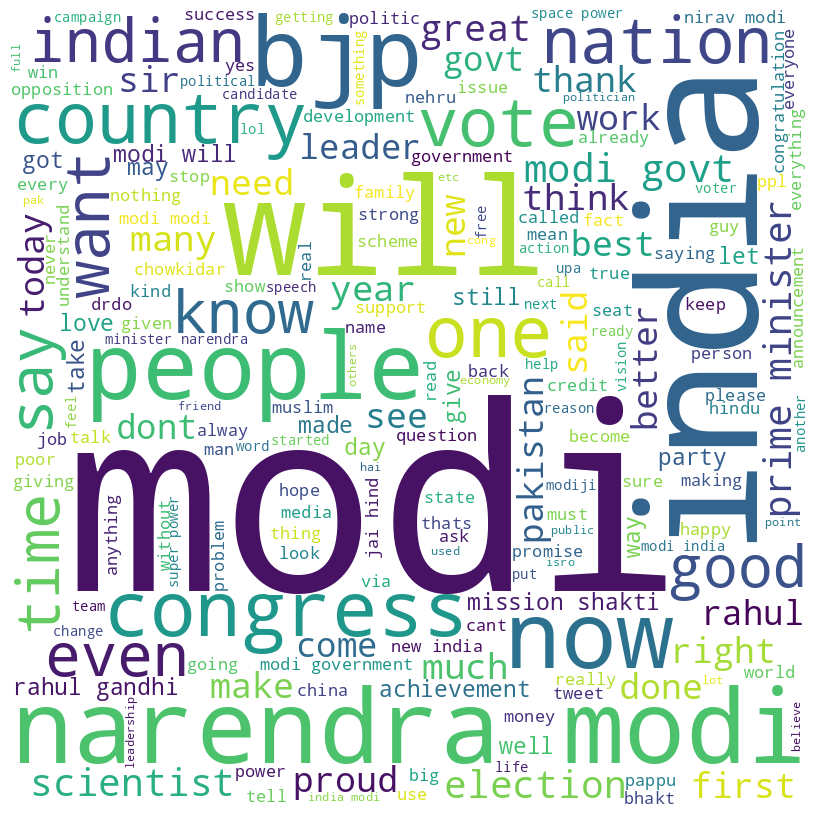

In [ ]:
#Generate Positive tweet words cloud
wordcount_gen(df, 'Positive')
#fill code

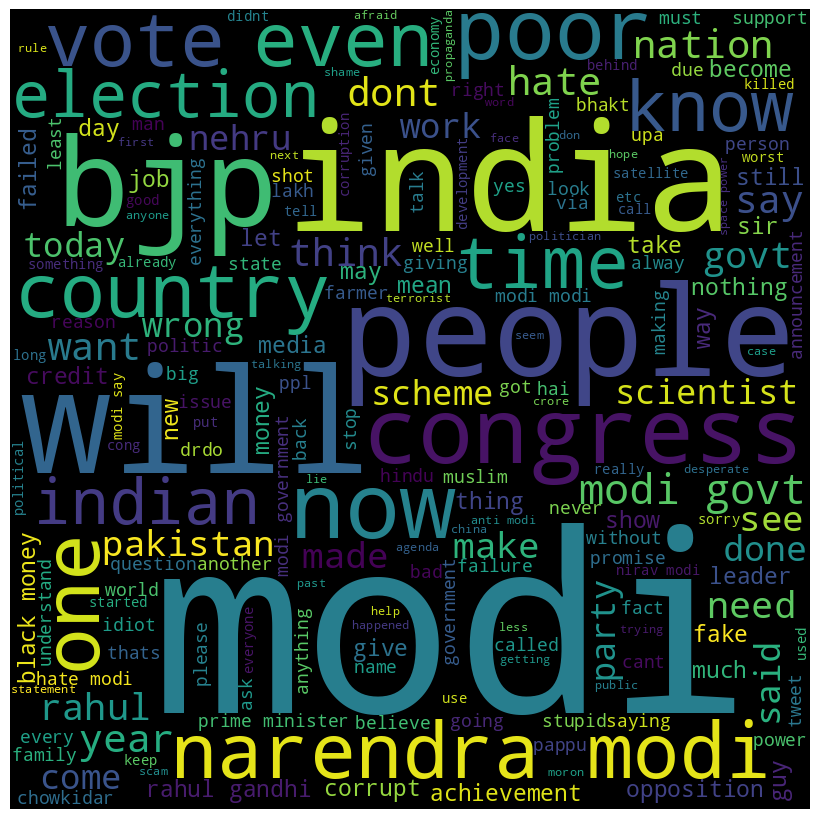

In [ ]:
#Generate Negative tweet words cloud
wordcount_gen(df, 'Negative')
#fill code

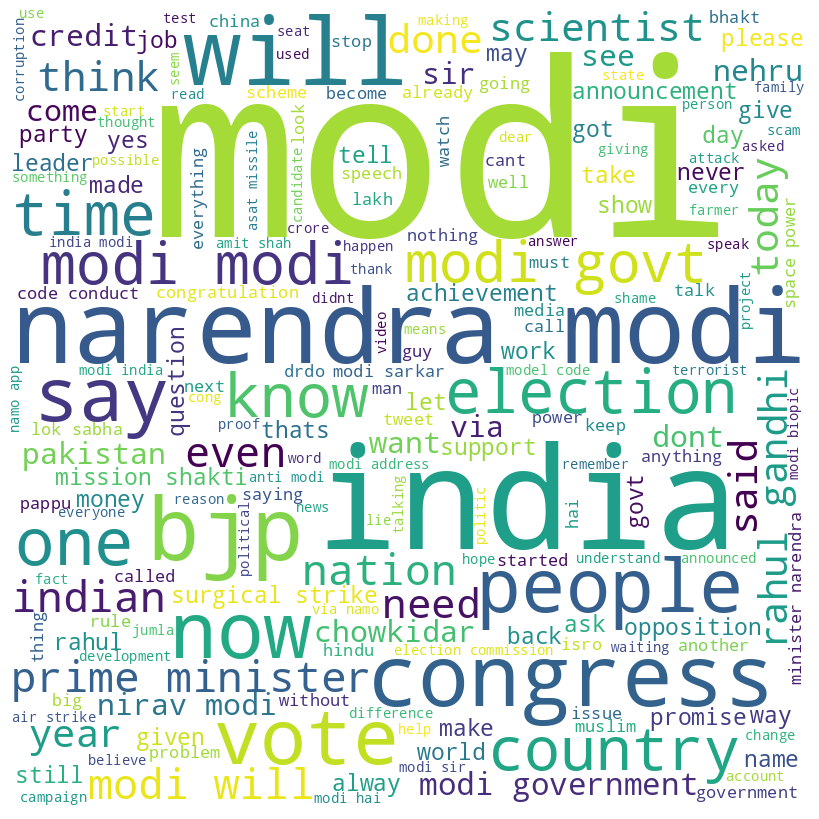

In [ ]:
#Generate Neutral tweet words cloud
wordcount_gen(df,'Neutral')
#fill code

# **Cleaning the tweets using RegEx and NLTK**

In [ ]:
#fill code to return the cleaned tweet using RegEx and NLTK
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    # Remove non-letter characters
    tweet = re.sub(r"[^a-zA-Z]", " ", tweet)

    # Tokenize the tweet
    words = tweet.split()

    # Remove stop words
    words = [word for word in words if word not in stopwords.words('english')]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return words


print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [ ]:
# Encode target labels using scikit learn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['category'])
df['category'] = le.transform(df['category'])
#fill code

In [ ]:
#train test splitting using scikit learn
train, test = train_test_split(df,test_size = 0.1)
train = train[train.category != 0]

#**Train Test Split for training the Regression model**

In [ ]:
#Transform the training and testing data using countvectorizer

#fill code
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df['clean_text'].fillna('', inplace=True)
vectorizer.fit(df['clean_text'])
print("Vocabulary: ", vectorizer.vocabulary_)
vector = vectorizer.transform(df['clean_text'])
print("Encoded Document is:")
print(vector.toarray())

#fill code


Vocabulary:  {'when': 74044, 'modi': 44478, 'promised': 54653, 'minimum': 43860, 'government': 28950, 'maximum': 42944, 'governance': 28929, 'expected': 24751, 'him': 31411, 'begin': 9632, 'the': 68147, 'difficult': 20840, 'job': 36671, 'reforming': 57183, 'state': 65002, 'why': 74196, 'does': 21684, 'take': 67000, 'years': 75263, 'get': 28145, 'justice': 37115, 'should': 62588, 'and': 5808, 'not': 48339, 'business': 12652, 'exit': 24710, 'psus': 55110, 'temples': 67672, 'talk': 67070, 'all': 5156, 'nonsense': 48241, 'continue': 17110, 'drama': 22094, 'will': 74282, 'vote': 73045, 'for': 26622, 'what': 73977, 'did': 20761, 'just': 37111, 'say': 60552, 'welcome': 73847, 'bjp': 11018, 'told': 69331, 'you': 75565, 'rahul': 55980, 'main': 41797, 'campaigner': 12964, 'think': 68512, 'relax': 57433, 'asking': 7263, 'his': 31698, 'supporters': 66277, 'prefix': 53988, 'chowkidar': 14966, 'their': 68203, 'names': 46671, 'great': 29329, 'service': 61716, 'now': 48467, 'there': 68344, 'confusion'

In [ ]:
from re import X
#train multivariate logistic regression on the data using scikit learn

#fill code
x_train = train['clean_text']
y_train = train['category']
x_test = test['clean_text']
y_test = test['category']
x_train.fillna('', inplace=True)
y_train.fillna('', inplace=True)
train_data_features = vectorizer.transform(x_train)
print(train_data_features.shape)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
model.fit(train_data_features, y_train)
#fill code



(69350, 76190)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [ ]:
#predict using your model on the testing dataset

#fill code

x_test.fillna('', inplace=True)
y_test.fillna('', inplace=True)
test_data_features = vectorizer.transform(x_test)

result = model.predict(test_data_features)
y_pred_LR = result
y_test = test['category']
result
#fill code



array([1, 2, 2, ..., 1, 2, 1])

# **Analysing the Results**

Text(0.5, 427.9555555555555, 'Predicted label')

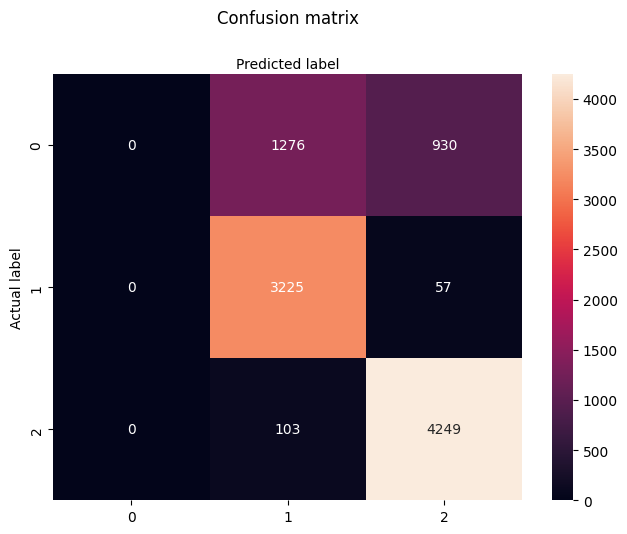

In [ ]:
#Calculate and plot the Confusion matrix

#fill code
from sklearn import metrics
import seaborn as sns
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,  color = 'Red'  ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#fill code



In [ ]:
#calculate the precision , recall and accuracy using scikit learn

#fill code

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_LR))
print("Precision:",metrics.precision_score(y_test, y_pred_LR,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred_LR,average='weighted'))

#fill code



Accuracy: 0.7595528455284553
Precision: 0.5925411231789831
Recall: 0.7595528455284553


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hope You Learnt the techniques for sentiment analysis , remember this is just the tip of the iceberg, there is alot to learn.. so keep learning... keep growing :) .